In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# read csv
taxi = pd.read_csv('taxi.csv')

In [3]:
# modify time to 'datetime' format
taxi['time'] = pd.to_datetime(taxi['time'])
taxi['time'] = taxi['time'].apply(lambda x:x.replace(year=2013,month=10,day=22))

In [4]:
# sort csv according to time and taxi_id
taxi = taxi.sort_values(by=['time','taxi_id'])

# 热门地点
1. 宝安机场：(113.79369,113.83369), (22.60403,22.64403)
2. 深圳北站：(114.02505,114.03305), (22.60552,22.61352)
3. 福田区：(114.03980,114.07980), (22.50889,22.54889)
4. 南山区：(113.91002,113.95002), (22.50098,22.54098)
5. 罗湖区：(114.11469,114.13469), (22.53539,22.55539)

In [50]:
lon = 114.12469
lat = 22.54539
lon_range = 0.01
lat_range = 0.01
lon_min = lon-lon_range
lon_max = lon+lon_range
lat_min = lat-lat_range
lat_max = lat+lat_range

In [51]:
taxi_luohu = taxi[(taxi['lon']>=lon_min) & (taxi['lon'] <= lon_max) & (taxi['lat']>=lat_min) & (taxi['lat']<=lat_max)]

In [52]:
taxi_luohu_time = taxi_luohu[['taxi_id','time']].set_index('time')
taxi_luohu_time.to_csv('taxi_throughput_luohu.csv')

In [53]:
taxi_luohu_mingroup = taxi_luohu_time.resample('T').nunique()

In [54]:
taxi_luohu_hourgroup = taxi_luohu_time.resample('H').nunique()

In [55]:
taxi_luohu_daygroup = taxi_luohu_time.resample('D').nunique()

In [56]:
taxi_luohu_daygroup.head()

,taxi_id
time,
2013-10-22,1990


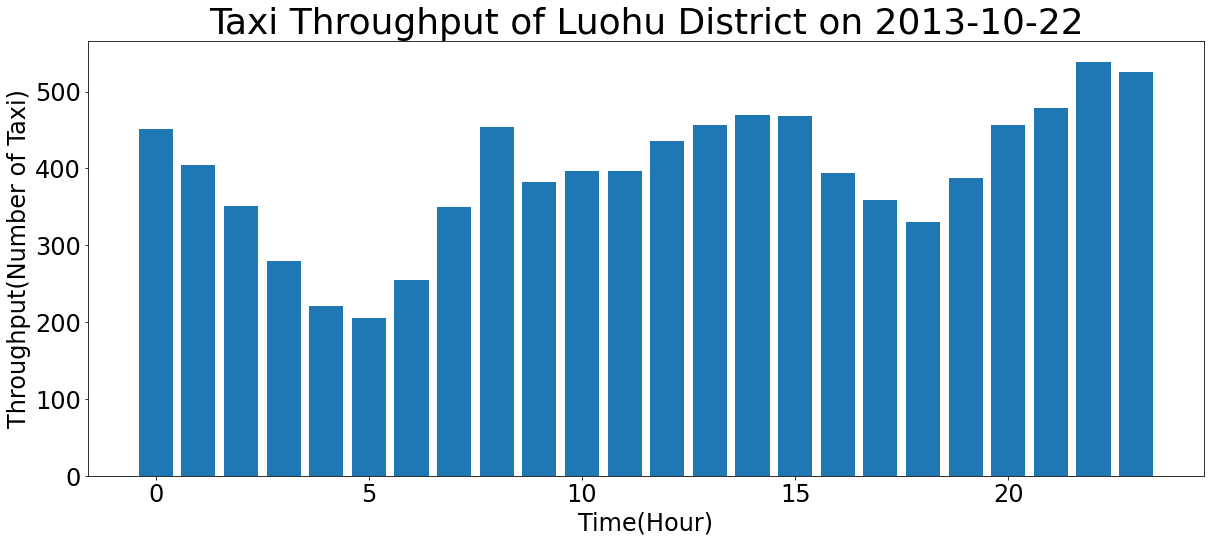

In [57]:
fig = plt.figure(figsize=(20,8))
fig = plt.bar(taxi_luohu_hourgroup.index.hour,taxi_luohu_hourgroup['taxi_id'])
plt.title('Taxi Throughput of Luohu District on 2013-10-22',fontdict={'size':36})
plt.xlabel('Time(Hour)',fontdict={'size':24})
plt.ylabel('Throughput(Number of Taxi)',fontdict={'size':24})
plt.tick_params(labelsize=24)
plt.savefig('taxi throughput luohu.png')